In [4]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
d = load_wine(as_frame=True)
df = d["data"]
X = df.values
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=100)

# Univariate Regression (2 variables)

In [8]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [9]:
x_train = df_train["flavanoids"].values.reshape(-1, 1)
y_train = df_train["od280/od315_of_diluted_wines"].values

x_test = df_test["flavanoids"].values.reshape(-1, 1)
y_test = df_test["od280/od315_of_diluted_wines"].values

## Linear Regression

In [10]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [11]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.5197317]
Intercept: 
 1.5724936793693256


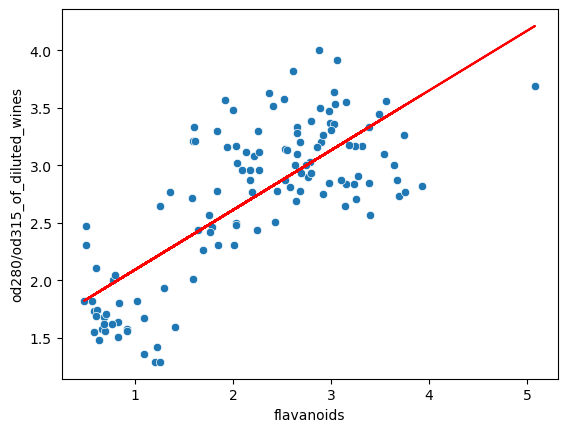

In [ ]:
sns.scatterplot(data=df_train, x="flavanoids", y="od280/od315_of_diluted_wines")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

In [ ]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.656
MSE: 0.182
MAE: 0.335


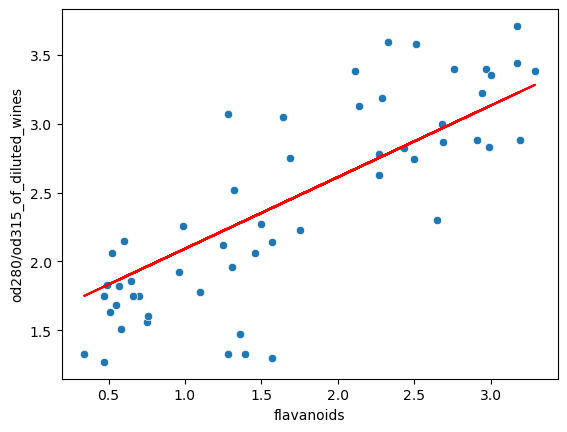

In [ ]:
sns.scatterplot(data=df_test, x="flavanoids", y="od280/od315_of_diluted_wines")
plt.plot(x_test, reg.coef_[0]*x_test+reg.intercept_, c="red")

### Ridge

In [ ]:
reg = Ridge()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.51548316]
Intercept: 
 1.5817414559720187


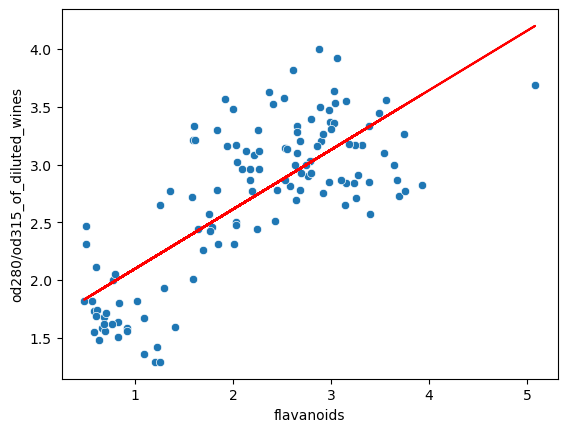

In [ ]:
sns.scatterplot(data=df_train, x="flavanoids", y="od280/od315_of_diluted_wines")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

### Lasso

In [ ]:
reg = Lasso()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.]
Intercept: 
 2.7037903225806454


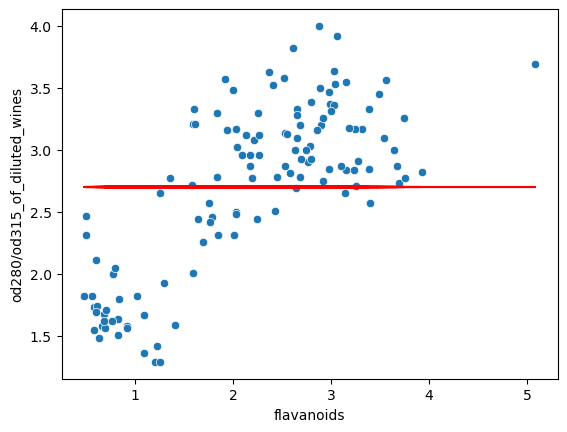

In [ ]:
sns.scatterplot(data=df_train, x="flavanoids", y="od280/od315_of_diluted_wines")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

## Nonlinear regression

### Decision Tree Regressor

*ccp_alpha* = parametro del decision regression tree. Nel progetto dovremmo provare a modificare questo paraemtro per vedere che succede

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg = DecisionTreeRegressor()

In [ ]:
reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.546
MSE: 0.240
MAE: 0.374


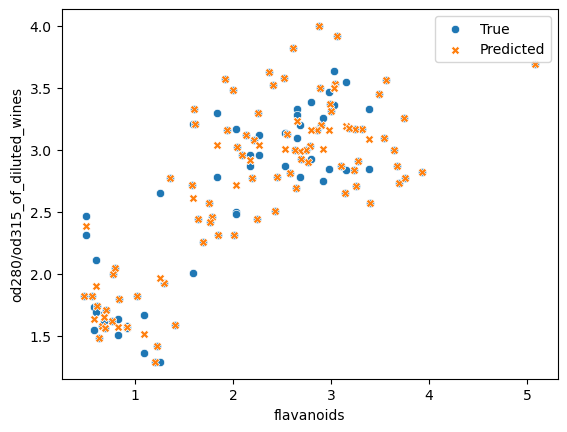

In [ ]:
sns.scatterplot(data=df_train, x="flavanoids", y="od280/od315_of_diluted_wines", label="True")
sns.scatterplot(data=df_train, x="flavanoids", y=reg.predict(x_train), label="Predicted", marker="X")
plt.legend()
plt.show()

### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
reg = KNeighborsRegressor()

In [ ]:
reg.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.579
MSE: 0.223
MAE: 0.371


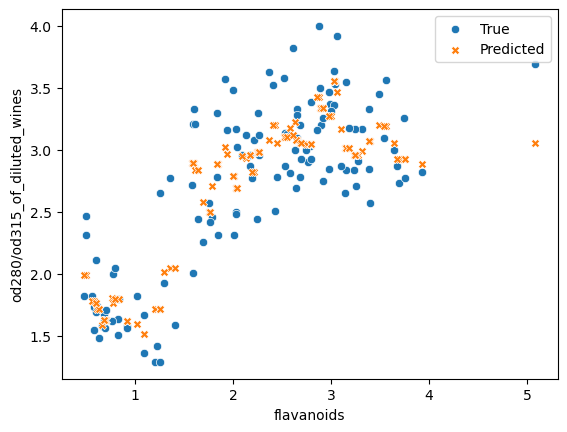

In [ ]:
sns.scatterplot(data=df_train, x="flavanoids", y="od280/od315_of_diluted_wines", label="True")
sns.scatterplot(data=df_train, x="flavanoids", y=reg.predict(x_train), label="Predicted", marker="X")
plt.legend()
plt.show()

# Multivariate Regression (3+ variables)

In [ ]:
X_train = df_train[["flavanoids", "proline"]].values
y_train = df_train["od280/od315_of_diluted_wines"].values

X_test = df_test[["flavanoids", "proline"]].values
y_test = df_test["od280/od315_of_diluted_wines"].values


## Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.625
MSE: 0.198
MAE: 0.345


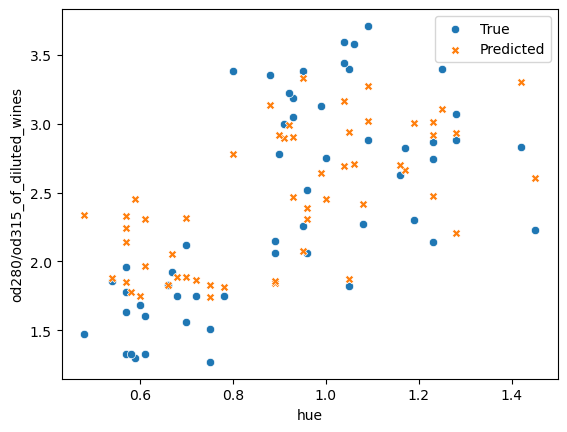

In [ ]:
sns.scatterplot(data=df_test, x="hue", y="od280/od315_of_diluted_wines", label="True")
sns.scatterplot(data=df_test, x="hue", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

## Nonlinear Regression

In [ ]:
reg = DecisionTreeRegressor()

In [ ]:
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.452
MSE: 0.290
MAE: 0.399


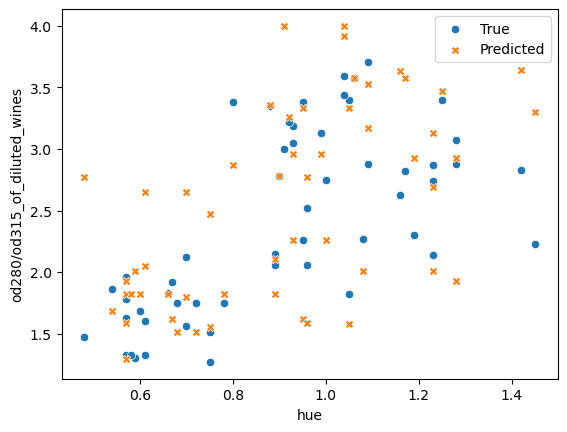

In [ ]:
sns.scatterplot(data=df_test, x="hue", y="od280/od315_of_diluted_wines", label="True")
sns.scatterplot(data=df_test, x="hue", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()